# **Breast Cancer Detection**

This project is to create CNN algorithm for testing Breatcancer images ( Ultrasonic images)


### <b>Loading libraries</b>

In [55]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
import cv2
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from keras import optimizers
adam = optimizers.Adam(learning_rate=0.001)


warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b> load the train images</b>

In [56]:
# Storing the path of the extracted "train" folder 
train_dir = 'Data/cell_images/train/'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels ( 1 - parasitized)
train_labels = []

In [57]:
# Path of the folder
images_path = os.listdir(train_dir )

for i, image_name in enumerate(images_path):
      
    try:
    
        # Opening each image using the path of that image
        image = Image.open(train_dir + image_name)

            # Resizing each image to (64, 64)
        image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
        train_images.append(np.array(image))            
        train_labels.append(1)
        
    except Exception:
        pass

# Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [58]:
# Storing the path of the extracted "test" folder 
test_dir = 'Data/cell_images/test/'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (1 - parasitized)
test_labels = []

In [59]:
  
# Path of the folder
images_path = os.listdir(test_dir )

for i, image_name in enumerate(images_path):

    try:
            # Opening each image using the path of that image
        image = Image.open(test_dir +  image_name)
            
            # Resizing each image to (64, 64)
        image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
        test_images.append(np.array(image))            
       
        test_labels.append(1)      


    except Exception:

        pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [60]:
print(test_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


###<b> Checking the shape of train and test images

In [61]:
# Shape of images
print("Shape of train images:", train_images.shape)
print("Shape of test images:", test_images.shape)

Shape of train images: (182, 64, 64, 4)
Shape of test images: (16, 64, 64, 4)


###<b> Checking the shape of train and test labels

In [62]:
# Shape of labels 
# print("label of train images:", train_labels.shape)
print("label of test images:", test_labels.shape)

label of test images: (16,)


####<b> Observations and insights: _____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [63]:
# Try to use min and max function from numpy
# Print the minimum and maximum pixel values for train images
print("Train images min:", np.min(train_images))
print("Train images max:", np.max(train_images))

# Print the minimum and maximum pixel values for test images
print("Test images min:", np.min(test_images))
print("Test images max:", np.max(test_images))

Train images min: 0
Train images max: 255
Test images min: 0
Test images max: 255


###<b>Normalize the images

In [64]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')

### <b>Data Exploration</b>
Let's visualize the images from the train data

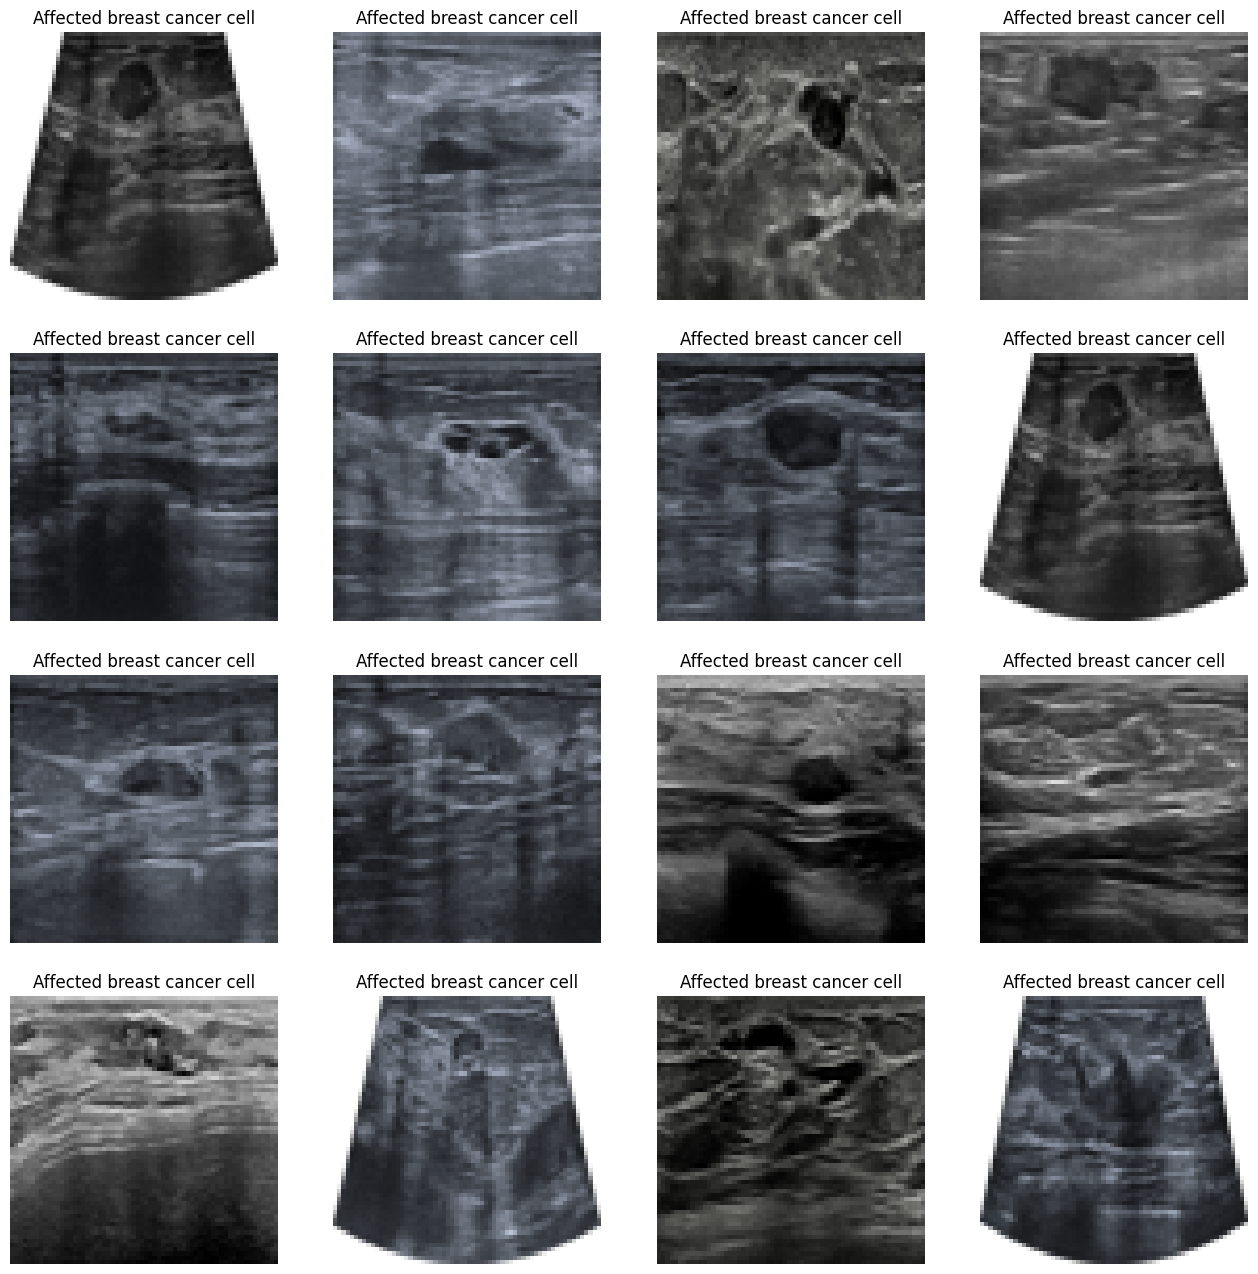

In [65]:
# This code will help you in visualizing both the Images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))
    plt.title('Affected breast cancer cell')

    plt.imshow(train_images[index])

    plt.axis('off')

###<b> Plotting the mean images for parasitized and uninfected

In [66]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

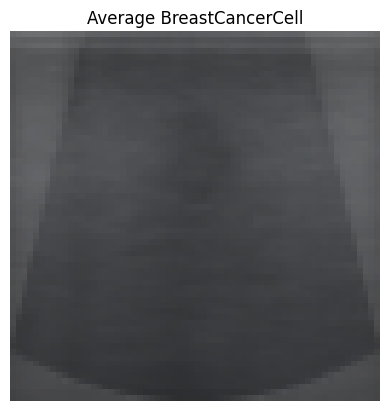

In [67]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'BreastCancerCell')   # find the mean

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [68]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


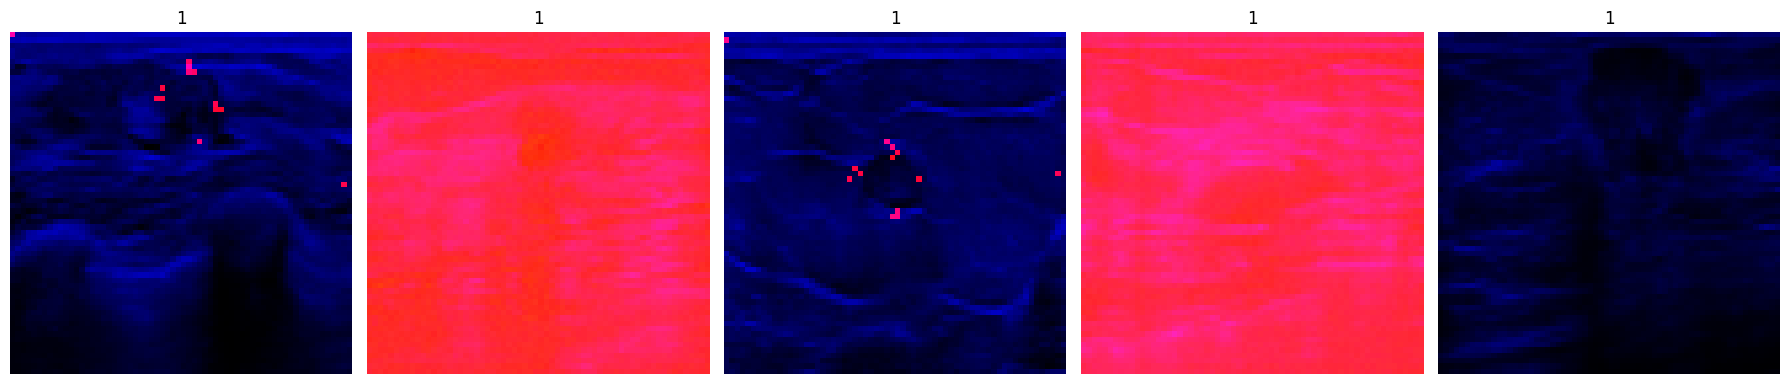

In [69]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [70]:
# Similarly you can visualize for the images in the test data
gfxtest=[]   # to hold the HSV image array

for i in np.arange(0, 15, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfxtest.append(a)

gfxtest = np.array(gfxtest)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


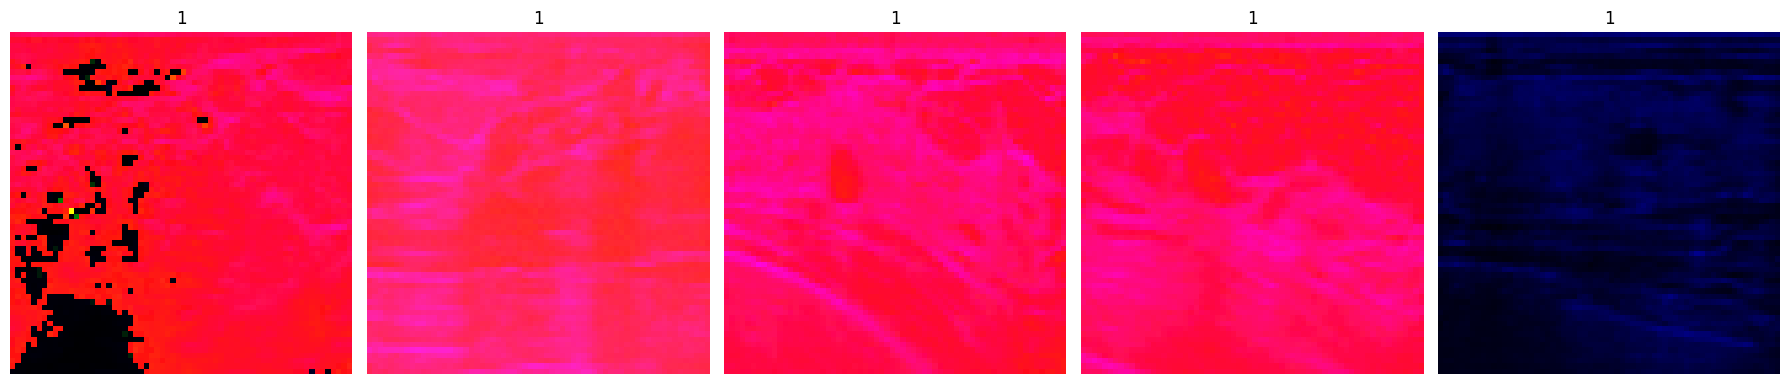

In [71]:
viewimage = np.random.randint(1, 15, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfxtest[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<B>One Hot Encoding on the train and test labels

In [72]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Model Building**


###<b> Importing the required libraries for building and training our Model

In [73]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [74]:
# Creating sequential model
def cnn_BaseModel():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 4)))

    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.2))

    model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.2))

    model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(512, activation = "relu"))

    model.add(Dropout(0.4))

    model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

    return model

In [75]:
cnn_BaseModel = cnn_BaseModel()

In [76]:
cnn_BaseModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [77]:
cnn_BaseModel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [78]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [79]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = cnn_BaseModel.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 100, verbose = 1)

Epoch 1/100
5/5 [==============================] - 1s 47ms/step - loss: 0.1613 - accuracy: 0.9448 - val_loss: 2.9639e-04 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 25ms/step - loss: 1.8603e-07 - accuracy: 1.0000 - val_loss: 9.3612e-08 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 26ms/step - loss: 2.4661e-12 - accuracy: 1.0000 - val_loss: 2.0787e-10 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 24ms/step - loss: 1.7319e-16 - accuracy: 1.0000 - val_loss: 2.8681e-12 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 1.5221e-18 - accuracy: 1.0000 - val_loss: 1.5747e-13 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 1.2983e-20 - accuracy: 1.0000 - val_loss: 2.3051e-14 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 27ms/step - loss: 5.6905e-21 - accuracy: 1.0000 - val_loss: 6.

###<b> Evaluating the model on test data

In [84]:
accuracy = cnn_BaseModel.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

1/1 [==============================] - 0s 21ms/step - loss: 1.0113e-16 - accuracy: 1.0000

 Test_Accuracy:- 1.0


<b> Plotting the confusion matrix

1/1 [==============================] - 0s 23ms/step


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



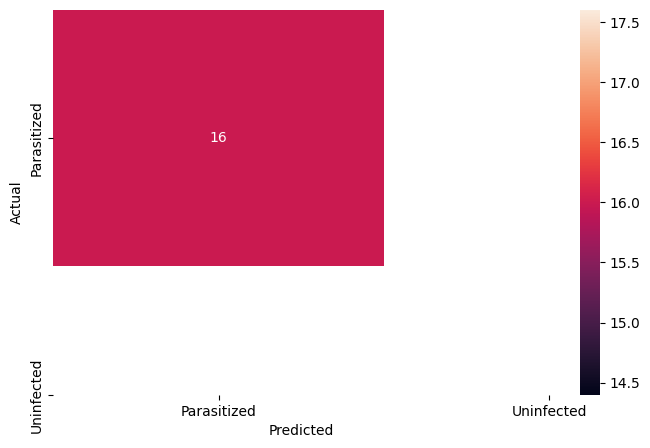

In [85]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = cnn_BaseModel.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

# sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Parasitized', 'Uninfected'], yticklabels = ['Parasitized', 'Uninfected'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [86]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

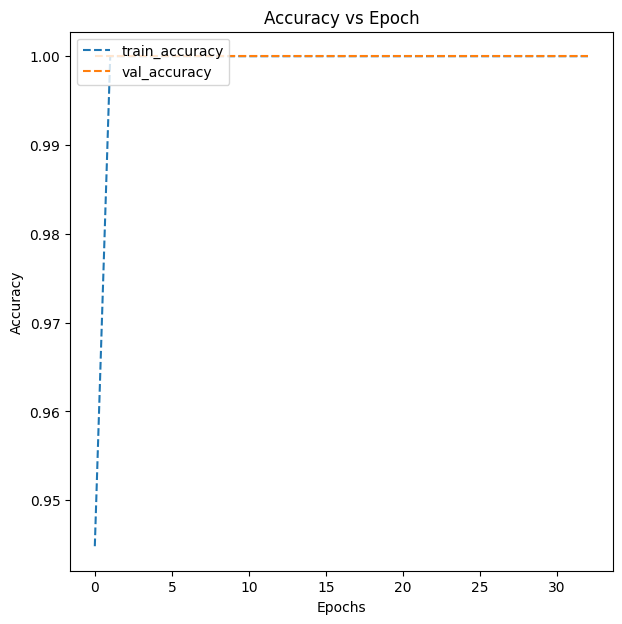

In [83]:
plot_accuracy(history)